In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
sns.load_dataset?

In [2]:
# .load_dataset("tips")
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [18]:
tips.shape

(244, 7)

## Types of Data
- Continuous data => numeric and lots and lots of possibilities (potentially infinite resolution)
    - lunch bill
    - temperature
    - prices
    - height 
    - Grade - GPA
- Categorical/Discrete data
    - Categorical means a set of category options
    - Discrete means numerical data with a small set of (whole) possibilities
    - Letter grades (a, b, c, d, f...)
    - day of the week
    - number of people at a restaurant table (discrete)
    - traffic light color 
    - Month name 
    - Parking lot or arena seating names
    - Chessboard options

Text(0.5, 0.98, 'Scatterplot Example')

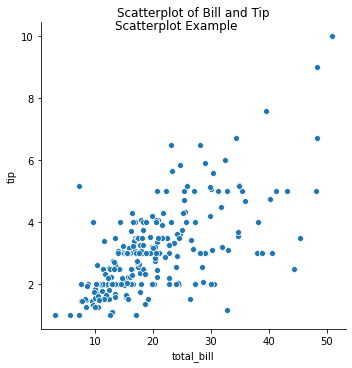

In [9]:
# Scatter Chart
sns.relplot(x="total_bill", y="tip", data=tips)
plt.title("Scatterplot of Bill and Tip")
plt.suptitle("Scatterplot Example")

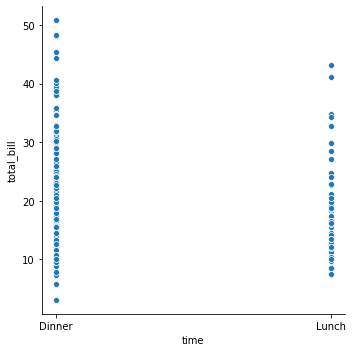

In [10]:
# total_bill is continuous
# time of day is categorical
# you'll see bands
# not quite as usefull...
sns.relplot(x="time", y="total_bill", data=tips)

In [ ]:
# What if we want to plot out two continuous variables through the lense of a categorical variable

## How to show multiple dimensions of categorical variables
- Use col="column_name" argument to make a new plot for each categorical value
- Use hue="column_name" argument to color code categorical values (does shades for continuous values)

Text(0.5, 1.0, 'Scatterplot of Total Bill vs. $Tip broken out by time of day')

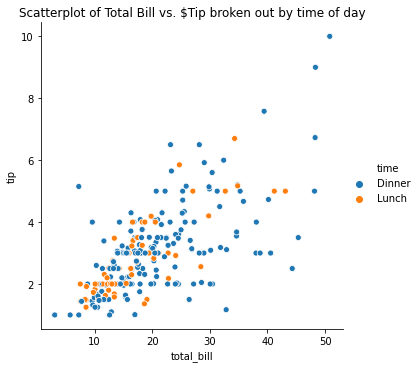

In [12]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips)
plt.title("Scatterplot of Total Bill vs. $Tip broken out by time of day")

Text(0.5, 1.0, 'Bill vs. Tip by smoking status')

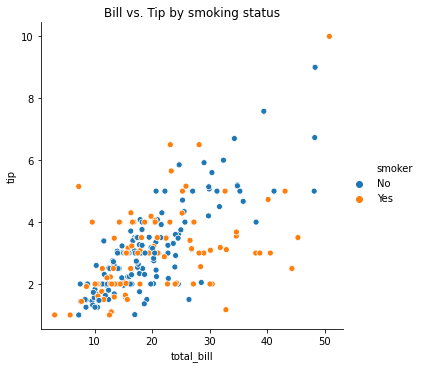

In [14]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.title("Bill vs. Tip by smoking status")

Text(0.5, 1.0, 'Bill vs. Tip by table size')

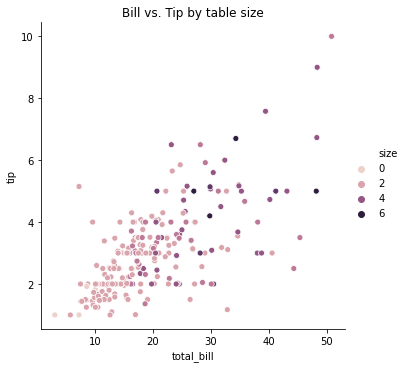

In [22]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.title("Bill vs. Tip by table size")

Text(0.5, 1.0, 'Bill vs. table size hue by tip amount')

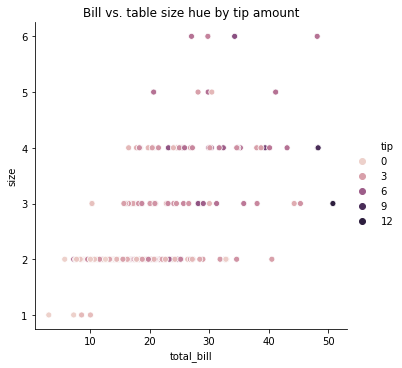

In [23]:
sns.relplot(x="total_bill", y="size", hue="tip", data=tips)
plt.title("Bill vs. table size hue by tip amount")

In [16]:
small_example = tips.head(4)
small_example

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2

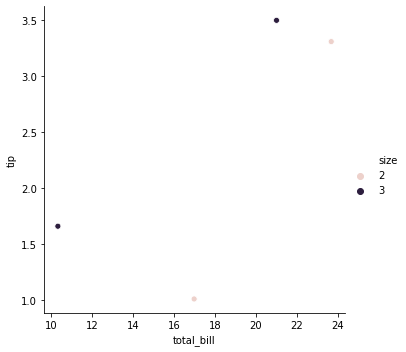

In [19]:
sns.relplot(x="total_bill", y="tip", hue="size", data=small_example)

## col=column_name argument makes a new plot per each discrete/categorical value

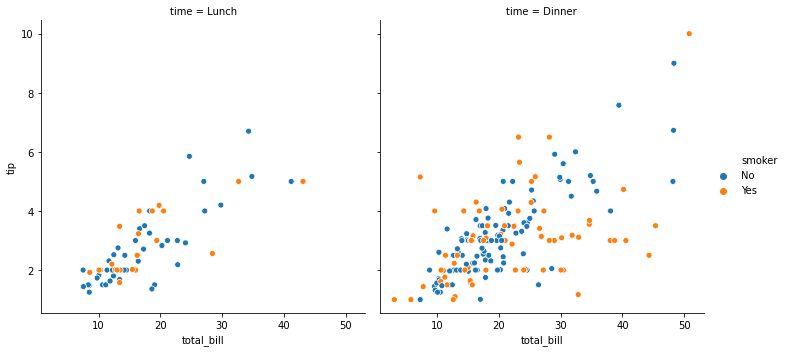

In [25]:
sns.relplot(x="total_bill", y="tip", data=tips, col="time", hue="smoker")


Text(0.5, 0.98, 'Bill vs. Tips broken out by day and by time of day')

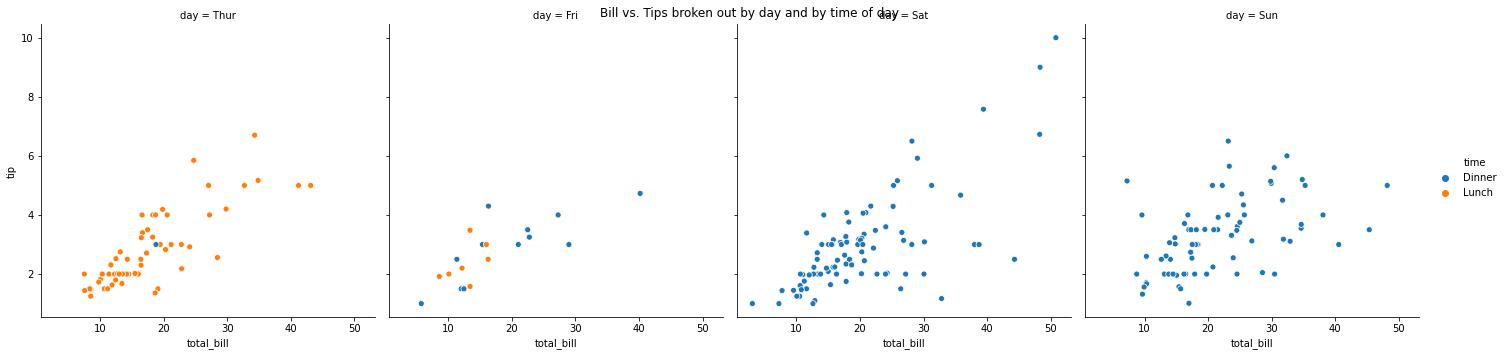

In [27]:
sns.relplot(x="total_bill", y="tip", data=tips, col="day", hue="time")
plt.suptitle("Bill vs. Tips broken out by day and by time of day")

##  Findings and takeaways so far
- As total bill increases, the tip amount seems to increase, too
- Saturday and Sunday are dinner days
- Thursday is almost completely a lunch day
- Friday is mixed between lunch and dinner

Text(0.5, 0.98, 'Bill vs. $ tip by day, by smoking status')

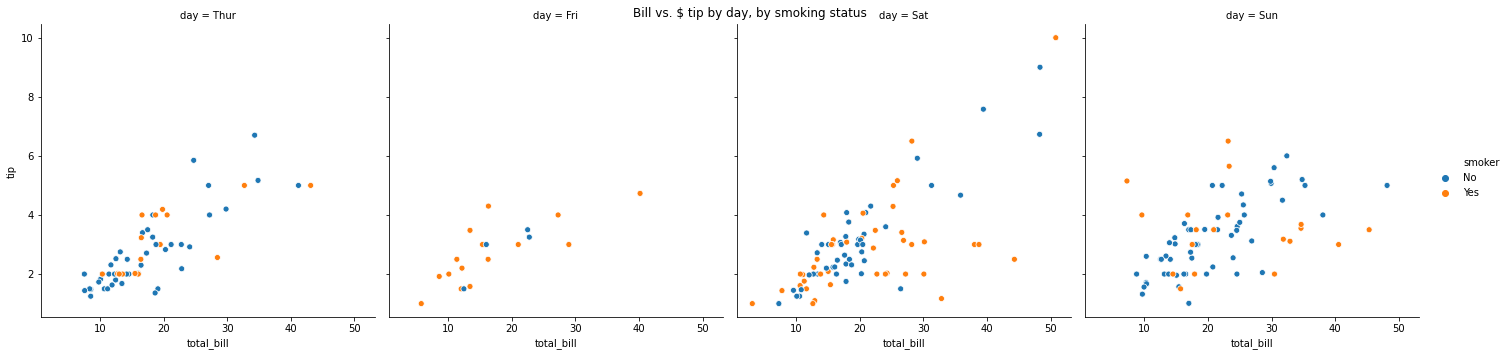

In [30]:
sns.relplot(x="total_bill", y="tip", data=tips, col="day", hue="smoker")
plt.suptitle("Bill vs. $ tip by day, by smoking status")

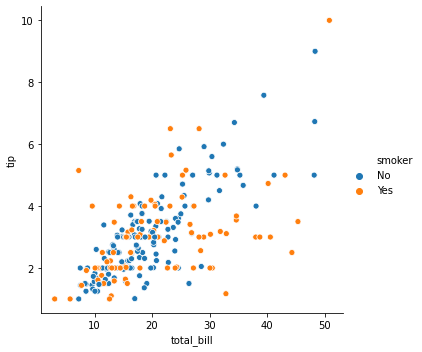

In [32]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

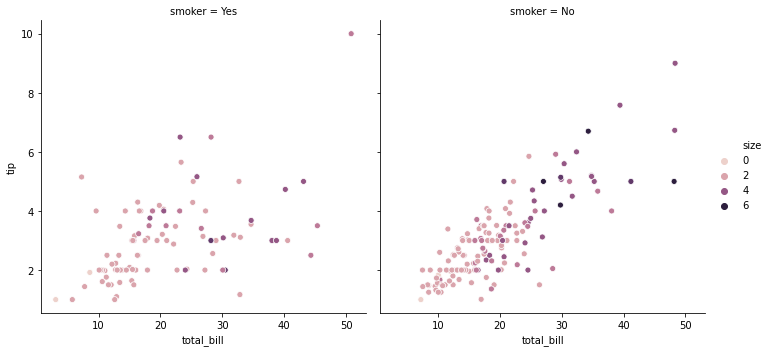

In [35]:
sns.relplot(x="total_bill", y="tip", col="smoker", data=tips, hue="size")

## Ways to add more columns to your chart:
- hue
- col
- style

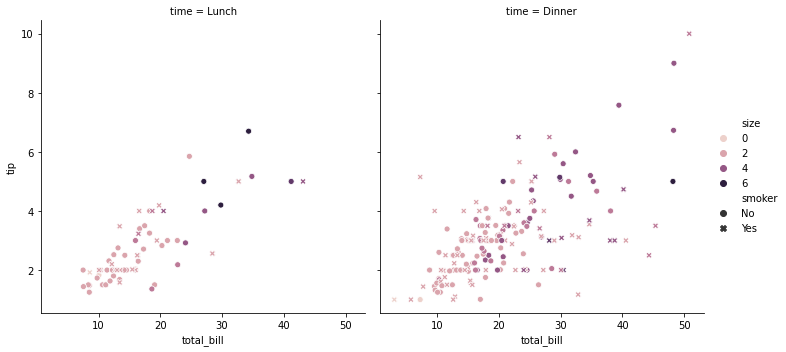

In [37]:
# 
sns.relplot(x="total_bill", y="tip", col="time", hue="size", style="smoker", data=tips)

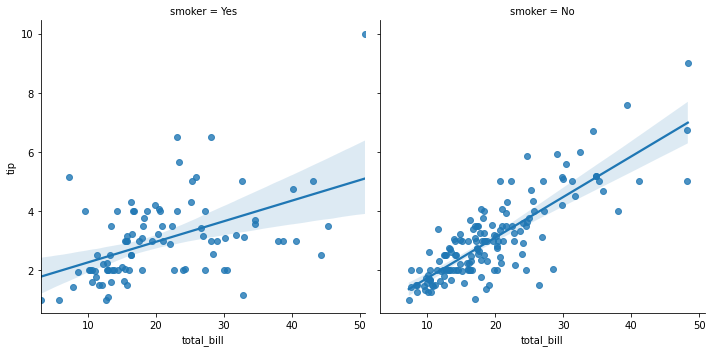

In [36]:
# Fit a linear model to the data
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

## Vizualization Best Practice
- Check the distribution of your data

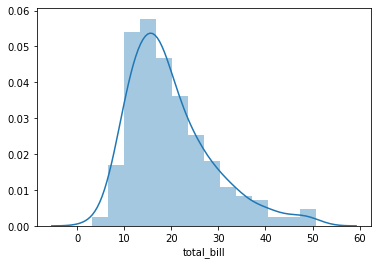

In [44]:
sns.distplot(tips.total_bill)

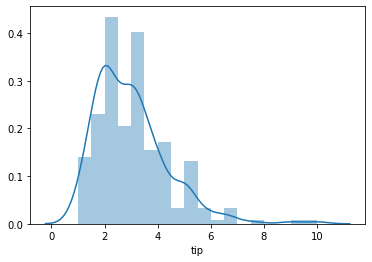

In [48]:
sns.distplot(tips.tip)

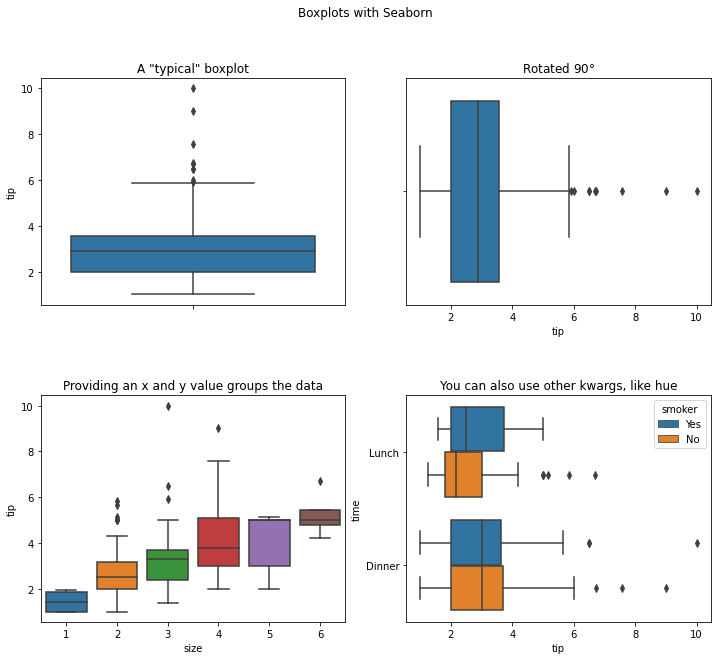

In [49]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(2, 2, 1)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(2, 2, 3)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(2, 2, 4)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

In [53]:
## Crosstab of size of table vs. time of day

data = pd.crosstab(tips.time, tips['size'])
data

size    1    2   3   4  5  6
time                        
Lunch   2   52   5   5  1  3
Dinner  2  104  33  32  4  1

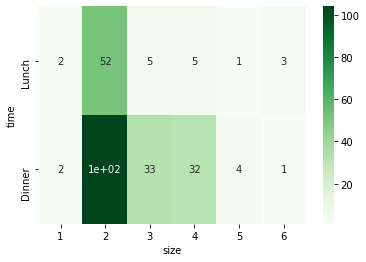

In [54]:
# Feed a heatmap a .crosstab OR a .pivot
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)


In [56]:
data = pd.crosstab(tips.time, tips.smoker)
data

smoker  Yes   No
time            
Lunch    23   45
Dinner   70  106

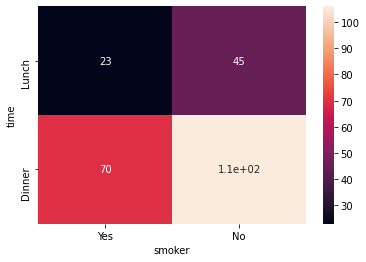

In [58]:
sns.heatmap(data, annot=True)

In [61]:
# Average tip amount by day broken out by smoking status
data = tips.pivot_table(values="tip", index="smoker", columns="day", aggfunc="mean")
data

day         Thur     Fri       Sat       Sun
smoker                                      
Yes     3.030000  2.7140  2.875476  3.516842
No      2.673778  2.8125  3.102889  3.167895

Text(0.5, 1.0, 'Average tip by day by smoking status')

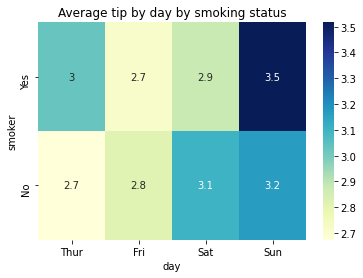

In [64]:
sns.heatmap(data, annot=True, cmap="YlGnBu")
plt.title("Average tip by day by smoking status")

In [65]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(tips.total_bill),
                   'tip': scale(tips.tip)})

df.head()

bill       tip
0 -0.314066 -1.436993
1 -1.061054 -0.967217
2  0.137497  0.362610
3  0.437416  0.225291
4  0.539635  0.442111

Text(0.5, 1.0, 'tip')

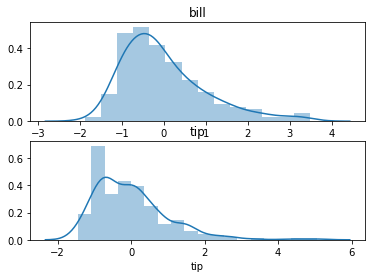

In [66]:
# .distplot shows the histogram of a series of values
# if we want to compare two histograms, we can do two subplots next to eachother :)
plt.subplot(211)
sns.distplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.distplot(df.tip)
plt.title('tip')

In [68]:
tips.shape

(244, 7)

In [74]:
tips.head()

total_bill   tip     sex smoker  day    time  size  is_smoker
0       16.99  1.01  Female     No  Sun  Dinner     2       True
1       10.34  1.66    Male     No  Sun  Dinner     3       True
2       21.01  3.50    Male     No  Sun  Dinner     3       True
3       23.68  3.31    Male     No  Sun  Dinner     2       True
4       24.59  3.61  Female     No  Sun  Dinner     4       True

In [76]:
tips = sns.load_dataset("tips")

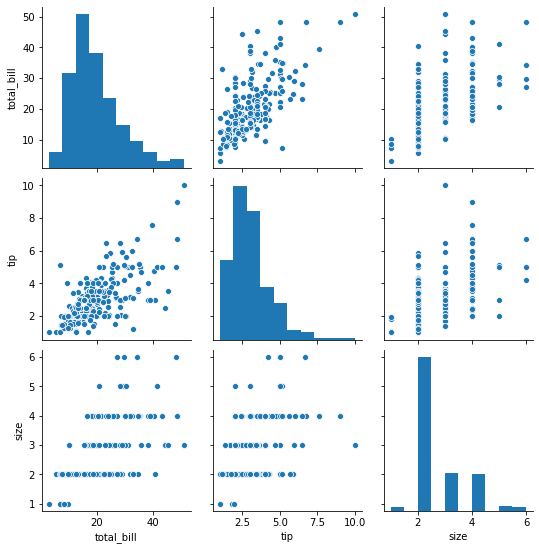

In [77]:
sns.pairplot(tips)

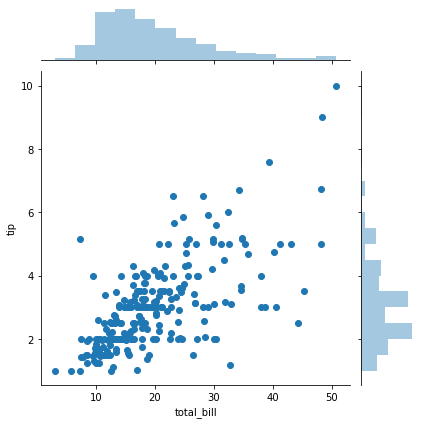

In [78]:
sns.jointplot(data=tips, x='total_bill', y='tip')

In [80]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind="reg")

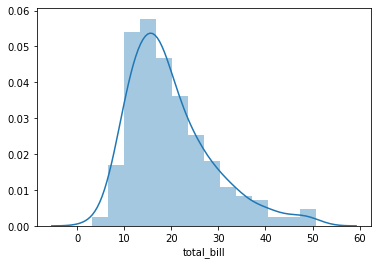

In [79]:
sns.distplot(tips.total_bill)